In [5]:
from sklearn.manifold import TSNE
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sb

In [9]:
from sklearn.datasets import fetch_mldata, fetch_openml
from sklearn.decomposition import PCA

In [20]:
mnist = fetch_openml('mnist_784')
x = mnist.data
y = mnist.target

In [21]:
x.shape

(70000, 784)

In [22]:
feat_cols = ['pixel' + str(i) for i in range(x.shape[1])]

df = pd.DataFrame(x, columns = feat_cols)
df['y'] = y
df['label'] = df['y'].apply(lambda i: str(i))

x,y = None, None

df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,y,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,9


In [24]:
np.random.seed(42)

rndperm = np.random.permutation(df.shape[0])

N = 10000

df_subset = df.loc[rndperm[:N], :].copy()

data_subset = df_subset[feat_cols].values

In [26]:
df_subset

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,y,label
46730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,8
48393,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,4
41416,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,8
34506,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,7
43725,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20679,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2
48140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,8
59195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,3
12633,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,8


In [27]:
data_subset

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [37]:
pca = PCA(n_components = 3)
pca_results = pca.fit_transform(data_subset)


In [38]:
df_subset['pca-one'] = pca_results[:,0]
df_subset['pca-two'] = pca_results[:,1]
df_subset['pca-three'] = pca_results[:,2]

pca.explained_variance_ratio_

array([0.09819946, 0.07123677, 0.06113222])

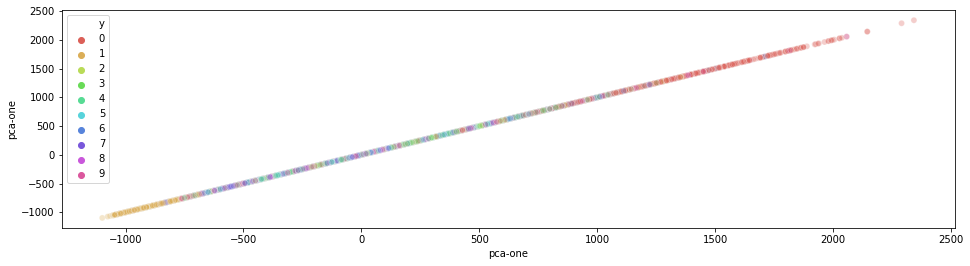

In [39]:
plt.figure(figsize = (16, 4))

sb.scatterplot(
    x='pca-one', y='pca-one',
    hue='y',
    palette=sb.color_palette('hls', 10),
    data = df_subset,
    legend = 'full',
    alpha = 0.3
)

In [28]:
pca_50 = PCA(n_components=50)

pca_results_50 = pca_50.fit_transform(data_subset)
print(pca_50.explained_variance_ratio_)

[0.09819946 0.07123677 0.06113222 0.05389196 0.04860683 0.04259303
 0.03336665 0.02922305 0.02782974 0.02376468 0.02092971 0.02011264
 0.01713892 0.01673122 0.0158643  0.01506206 0.01349786 0.01282187
 0.01179064 0.0114258  0.01049817 0.01019853 0.00985808 0.00925184
 0.00884266 0.00840735 0.00811475 0.00784379 0.0074114  0.00697318
 0.00654101 0.00647042 0.0060324  0.00583635 0.00555374 0.00538843
 0.00506669 0.00483526 0.0048019  0.00476072 0.00452819 0.00441197
 0.00413564 0.00398253 0.00381827 0.00374357 0.00359749 0.00345049
 0.00335541 0.00323249]


In [29]:
tsne = TSNE(n_components = 2, verbose = 0, perplexity = 40, n_iter = 300)
tsne_pca_results = tsne.fit_transform(pca_results_50)

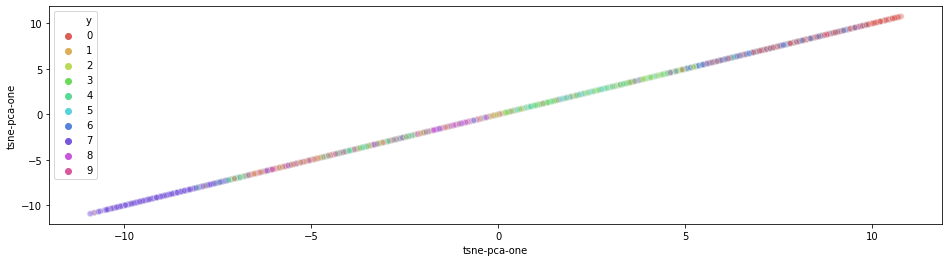

In [36]:
df_subset['tsne-pca-one'] = tsne_pca_results[:,0]
df_subset['tsne-pca-two'] = tsne_pca_results[:,1]

plt.figure(figsize = (16, 4))

sb.scatterplot(
    x='tsne-pca-one', y='tsne-pca-one',
    hue='y',
    palette=sb.color_palette('hls', 10),
    data = df_subset,
    legend = 'full',
    alpha = 0.3
)

In [33]:
df_subset

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,y,label,tsne-pca-one,tsne-pca-two
46730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8,8,-0.865147,-1.394953
48393,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4,4,-4.975216,-3.026452
41416,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8,8,0.855282,-8.401885
34506,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,7,7,-7.984001,1.318491
43725,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,7,7,-7.759291,2.579163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20679,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,2,2.563143,5.934147
48140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8,8,-1.187677,-3.646985
59195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3,3,3.534870,-1.660947
12633,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8,8,3.657304,-1.794030


In [47]:
new_shit = df_subset['label'].reset_index(drop=True)

'0       8\n1       4\n2       8\n3       7\n4       7\n5       0\n6       6\n7       2\n8       7\n9       4\n10      3\n11      9\n12      9\n13      8\n14      2\n15      5\n16      9\n17      1\n18      7\n19      8\n20      0\n21      0\n22      0\n23      3\n24      6\n25      3\n26      6\n27      1\n28      6\n29      9\n30      7\n31      6\n32      0\n33      8\n34      5\n35      5\n36      2\n37      9\n38      1\n39      6\n40      4\n41      9\n42      7\n43      7\n44      4\n45      5\n46      2\n47      7\n48      3\n49      9\n50      2\n51      0\n52      6\n53      8\n54      5\n55      3\n56      1\n57      4\n58      0\n59      9\n60      1\n61      7\n62      5\n63      3\n64      9\n65      5\n66      7\n67      9\n68      6\n69      0\n70      1\n71      7\n72      3\n73      0\n74      4\n75      3\n76      4\n77      3\n78      5\n79      6\n80      6\n81      6\n82      8\n83      2\n84      7\n85      1\n86      1\n87      3\n88      8\n89      8\n90      7